In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.oneway as oneway

In [2]:
m1 = [150, 151, 152, 152, 151, 150]
m2 = [153, 152, 148, 151, 149, 152]
m3 = [156, 154, 155, 156, 157, 155]

In [3]:
stats.f_oneway(m1, m2, m3)

F_onewayResult(statistic=22.264705882352935, pvalue=3.2374085509077445e-05)

### F calculated in manual calulation was 22.24
Numerator df =2, Denominator df = 15 We can find p value

Since the p value is very small, smaller than 0.05 hence we conclude that
there is at least one machine which is different from others

In [5]:
oneway.anova_oneway((m1, m2, m3), use_var = 'equal')

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 22.264705882352892
pvalue = 3.237408550907782e-05
df = (2.0, 15.0)
df_num = 2.0
df_denom = 15.0
nobs_t = 18.0
n_groups = 3
means = array([151.        , 150.83333333, 155.5       ])
nobs = array([6., 6., 6.])
vars_ = array([0.8       , 3.76666667, 1.1       ])
use_var = 'equal'
welch_correction = True
tuple = (22.264705882352892, 3.237408550907782e-05)

## Comparing cars mpg from three countries

In [6]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [7]:
mpg = sns.load_dataset('mpg')

In [8]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [11]:
mpg.groupby('origin').mean(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
origin,,,,,,,
europe,27.891429,4.157143,109.142857,80.558824,2423.300000,16.787143,75.814286
japan,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038
usa,20.083534,6.248996,245.901606,119.048980,3361.931727,15.033735,75.610442


In [12]:
mpg.groupby('origin').mean(numeric_only=True)['mpg']

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

In [13]:
mpg.groupby(['origin', 'cylinders']).mean(numeric_only=True)

mpg  displacement  horsepower       weight  \
origin cylinders                                                     
europe 4          28.411111    104.222222   78.311475  2330.015873   
       5          27.366667    145.000000   82.333333  3103.333333   
       6          20.100000    159.750000  113.500000  3382.500000   
japan  3          20.550000     72.500000   99.250000  2398.500000   
       4          31.595652     99.768116   75.579710  2153.492754   
       6          23.883333    156.666667  115.833333  2882.000000   
usa    4          27.840278    124.284722   80.956522  2437.166667   
       6          19.663514    226.283784   99.671233  3213.905405   
       8          14.963107    345.009709  158.300971  4114.718447   

                  acceleration  model_year  
origin cylinders                            
europe 4             16.722222   75.507937  
       5             18.633333   79.000000  
       6             16.425000   78.250000  
japan  3             13.250000   75.500000  
       4             16.569565   77.507246  
       6             13.550000   78.000000  
usa    4             16.526389   78.027778  
       6             16.474324   75.635135  
       8             12.955340   73.902913

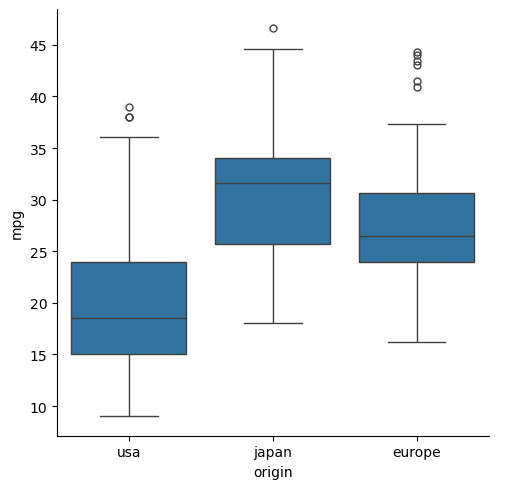

In [14]:
sns.catplot(data=mpg, x='origin', y='mpg', kind='box')

In [15]:
mpg[mpg['cylinders']==4]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
14,24.0,4,113.0,95.0,2372,15.0,70,japan,toyota corona mark ii
18,27.0,4,97.0,88.0,2130,14.5,70,japan,datsun pl510
19,26.0,4,97.0,46.0,1835,20.5,70,europe,volkswagen 1131 deluxe sedan
20,25.0,4,110.0,87.0,2672,17.5,70,europe,peugeot 504
21,24.0,4,107.0,90.0,2430,14.5,70,europe,audi 100 ls
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [16]:
mpg[mpg['cylinders']==4] ['mpg']

14     24.0
18     27.0
19     26.0
20     25.0
21     24.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 204, dtype: float64

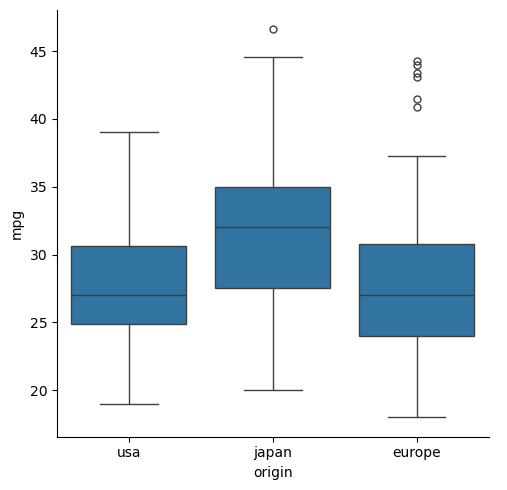

In [17]:
sns.catplot(data=mpg, x='origin', y=mpg[mpg['cylinders']==4] ['mpg'], kind='box')

In [18]:
eu = mpg[(mpg['cylinders'] ==4) & (mpg['origin'] == 'europe')] ['mpg']
jp = mpg[(mpg['cylinders'] ==4) & (mpg['origin'] == 'japan')] ['mpg']
us = mpg[(mpg['cylinders'] ==4) & (mpg['origin'] == 'usa')] ['mpg']

In [19]:
stats.f_oneway(eu, jp, us)

F_onewayResult(statistic=9.411845545485601, pvalue=0.00012379894210177303)

# Post Hoc Test


Post hoc tests attempt to control the experimentwise error rate(usually alpha = 0.05) just like one-
way ANOVA is used instead of multiple t-tests

In [10]:
import statsmodels.stats.oneway as oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [20]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [29]:
df = mpg[mpg['cylinders'] ==4] [['mpg', 'origin']]  # I need only 4 cylinder cars and only want mpg and origin column

In [32]:
result = pairwise_tukeyhsd(endog = df['mpg'] , groups = df['origin'], alpha=0.05)

In [34]:
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
europe  japan   3.1845  0.003  0.9267  5.4423   True
europe    usa  -0.5708 0.8186 -2.8061  1.6644  False
 japan    usa  -3.7554 0.0002 -5.9382 -1.5726   True
----------------------------------------------------


In [41]:
m13 = pd.concat([
pd.DataFrame(data = {'volume': m1, 'machine': 'Machine1'}),
pd.DataFrame(data = {'volume': m2, 'machine': 'Machine2'}),
pd.DataFrame(data = {'volume': m3, 'machine': 'Machine3'})
])

In [43]:
result = pairwise_tukeyhsd(endog = m13['volume'], groups = m13['machine'], alpha=0.05)

In [44]:
print(result)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
Machine1 Machine2  -0.1667  0.976 -2.2277 1.8944  False
Machine1 Machine3      4.5 0.0001  2.4389 6.5611   True
Machine2 Machine3   4.6667 0.0001  2.6056 6.7277   True
-------------------------------------------------------


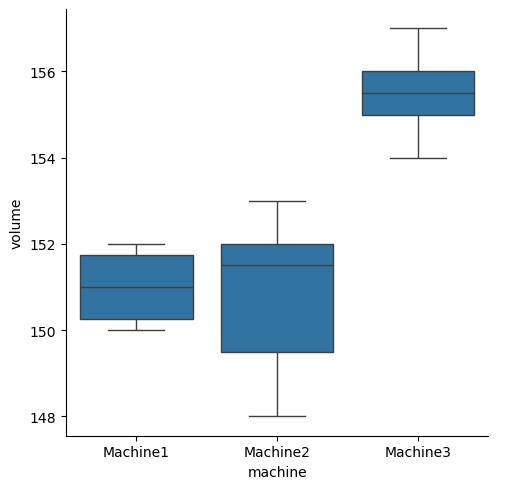

In [45]:
sns.catplot(data=m13, x='machine', y='volume', kind='box')

There is no significant diff between Machine 1 and machine 2 as p value is higher than 0.05
So we fail to reject the Null hypothesis
There is significant diff between {Machine1 Machine3} & {Machine2 Machine3} as pvalue is less than 0.05
so we reject the Null hypothesis